In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the dataset
from google.colab import files
files.upload()

Saving nti.xlsx to nti.xlsx


{'nti.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00GC[Y\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00GC[Y\x00\x00\x00\x

In [17]:
data = pd.read_excel('nti.xlsx')
data.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender
0,CMP1,Seasonal Steals,Influencer Marketing,2022-08-01,2024-04-26,22068.8,3283.2,2155.2,2316.656,8879.568,Baia Mare,25-34,Male
1,CMP2,Cart to Couch,Influencer Marketing,2022-09-18,2024-05-12,32849.6,3307.2,3164.8,7114.128,17302.032,Baia Mare,25-34,Male
2,CMP3,Deal of the Day,Paid Ads,2022-07-26,2024-04-07,12748.8,7494.4,7334.4,3358.448,4892.416,Galați,45-54,Female
3,CMP4,Shop & Share,Paid Ads,2022-08-21,2024-04-26,40196.8,21150.4,3032.0,4426.976,16548.544,Galați,18-24,Male
4,CMP5,Seasonal Steals,Paid Ads,2023-03-04,2024-11-04,4030.4,2806.4,2556.8,2331.776,3538.224,Galați,45-54,Male


In [18]:
# Copy data for transformations and analysis
df = data.copy()

# 1. Calculate Campaign Metrics
df['Conversion_Rate'] = (df['Conversions'] / df['Clicks']) * 100
df['CPC'] = df['Total_Spend'] / df['Clicks']
df['CPA'] = df['Total_Spend'] / df['Conversions']
df['ROAS'] = df['Revenue_Generated'] / df['Total_Spend']

df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender,Conversion_Rate,CPC,CPA,ROAS
0,CMP1,Seasonal Steals,Influencer Marketing,2022-08-01,2024-04-26,22068.8,3283.2,2155.2,2316.656,8879.568,Baia Mare,25-34,Male,65.643275,0.705609,1.074915,3.832925
1,CMP2,Cart to Couch,Influencer Marketing,2022-09-18,2024-05-12,32849.6,3307.2,3164.8,7114.128,17302.032,Baia Mare,25-34,Male,95.694243,2.151103,2.247892,2.432066
2,CMP3,Deal of the Day,Paid Ads,2022-07-26,2024-04-07,12748.8,7494.4,7334.4,3358.448,4892.416,Galați,45-54,Female,97.865073,0.448128,0.457904,1.456749
3,CMP4,Shop & Share,Paid Ads,2022-08-21,2024-04-26,40196.8,21150.4,3032.0,4426.976,16548.544,Galați,18-24,Male,14.335426,0.209309,1.460084,3.738115
4,CMP5,Seasonal Steals,Paid Ads,2023-03-04,2024-11-04,4030.4,2806.4,2556.8,2331.776,3538.224,Galați,45-54,Male,91.106043,0.830878,0.911990,1.517394


In [19]:
# 2. Channel Comparison
channel_metrics = df.groupby('Marketing_Channel').agg({
    'Conversion_Rate': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'ROAS': 'mean',
    'Total_Spend': 'sum',
    'Revenue_Generated': 'sum'
}).reset_index()

channel_metrics

,Marketing_Channel,Conversion_Rate,CPC,CPA,ROAS,Total_Spend,Revenue_Generated
0,Email,49.444310,0.733426,15.461874,2.585044,2028667.680,5296338.576
1,Influencer Marketing,49.035738,0.774515,5.586868,2.574927,2065317.536,5297396.496
2,Paid Ads,48.367993,1.103136,5.511860,2.632255,2040957.696,5343504.144
3,Social Media,49.334436,0.872979,5.354388,2.595439,2022255.344,5284499.824


In [20]:
# 3. Demographic Analysis
demographic_metrics = df.groupby(['Age_Group', 'Gender', 'Location']).agg({
    'Conversions': 'sum',
    'Revenue_Generated': 'sum'
}).reset_index()

demographic_metrics

,Age_Group,Gender,Location,Conversions,Revenue_Generated
0,18-24,Female,Bacău,472510.4,421413.968
1,18-24,Female,Baia Mare,348153.6,356320.208
2,18-24,Female,Galați,481974.4,482345.728
3,18-24,Female,Suceava,358004.8,470620.048
4,18-24,Female,Târgu Mureș,341337.6,340850.960
5,18-24,Male,Bacău,239846.4,310029.456
6,18-24,Male,Baia Mare,384780.8,413164.864
7,18-24,Male,Galați,604118.4,551013.936
8,18-24,Male,Suceava,468672.0,441816.240
9,18-24,Male,Târgu Mureș,379952.0,480817.168


In [21]:
# 4. Time-Based Analysis
df['Month_Year'] = df['End_Date'].dt.to_period("M")
time_metrics = df.groupby('Month_Year').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Total_Spend': 'sum',
    'Revenue_Generated': 'sum'
}).reset_index()

time_metrics['Month_Year'] = time_metrics['Month_Year'].astype(str)
time_metrics

,Month_Year,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated
0,2024-01,5163264.0,2521264.0,1294497.6,502812.576,1239811.456
1,2024-02,7004030.4,3632038.4,1914736.0,722437.488,1893954.544
2,2024-03,8523470.4,4324865.6,2156992.0,891174.864,2266483.488
3,2024-04,8157808.0,4386388.8,2352481.6,752377.056,2001229.584
4,2024-05,7345091.2,3691808.0,1843932.8,815072.400,2211765.408
5,2024-06,8605236.8,4272396.8,1958657.6,861864.256,2265620.656
6,2024-07,7215854.4,3702019.2,1837350.4,801293.296,1999970.112
7,2024-08,9406561.6,4443771.2,2162056.0,903090.560,2312293.792
8,2024-09,8199971.2,3859227.2,1965254.4,798559.264,2136895.008
9,2024-10,7941024.0,4068571.2,2090915.2,842365.040,2225202.448


<ipython-input-22-a3455f67ad37>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_metrics, x='Marketing_Channel', y='Conversion_Rate', palette='viridis')


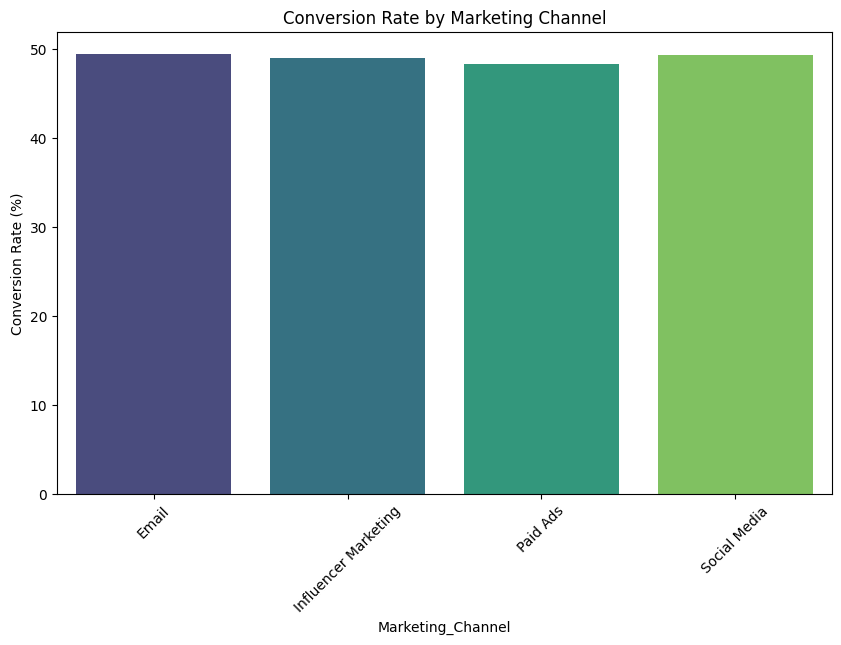

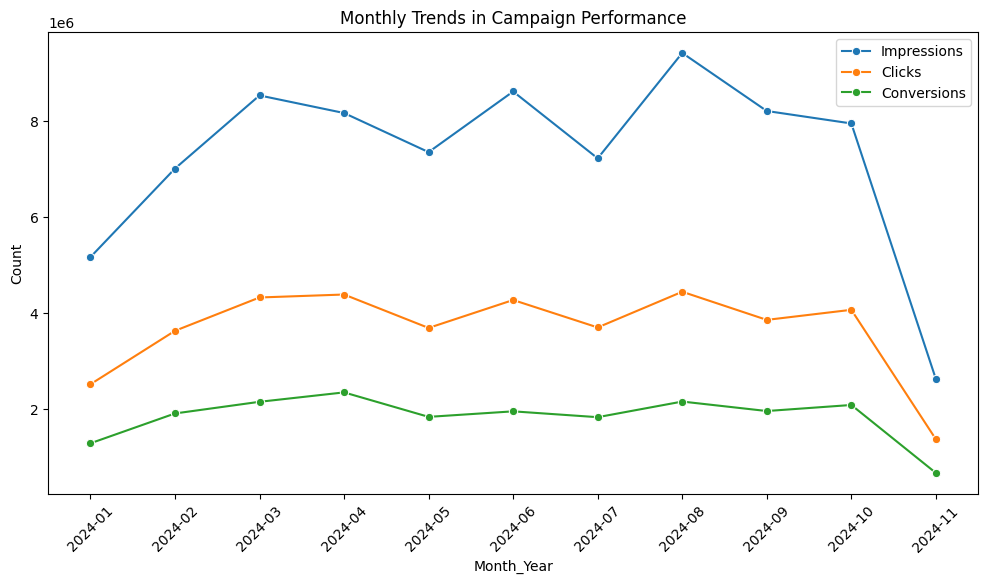

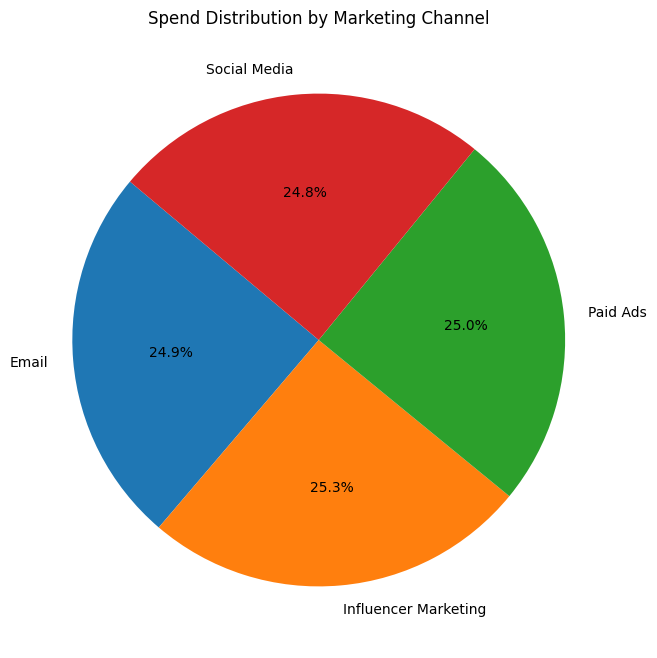

In [22]:
# KPI Summary
kpis = {
    'Total Impressions': df['Impressions'].sum(),
    'Total Clicks': df['Clicks'].sum(),
    'Total Conversions': df['Conversions'].sum(),
    'Total Spend': df['Total_Spend'].sum(),
    'Total Revenue': df['Revenue_Generated'].sum(),
    'Average CTR': (df['Clicks'].sum() / df['Impressions'].sum()) * 100,
    'Overall ROAS': df['Revenue_Generated'].sum() / df['Total_Spend'].sum()
}
kpis

# Plot Conversion Rate by Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_metrics, x='Marketing_Channel', y='Conversion_Rate', palette='viridis')
plt.title("Conversion Rate by Marketing Channel")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()

# Monthly Trends Line Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=time_metrics, x='Month_Year', y='Impressions', label='Impressions', marker='o')
sns.lineplot(data=time_metrics, x='Month_Year', y='Clicks', label='Clicks', marker='o')
sns.lineplot(data=time_metrics, x='Month_Year', y='Conversions', label='Conversions', marker='o')
plt.title("Monthly Trends in Campaign Performance")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Spend Distribution Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(channel_metrics['Total_Spend'], labels=channel_metrics['Marketing_Channel'], autopct='%1.1f%%', startangle=140)
plt.title("Spend Distribution by Marketing Channel")
plt.show()